# 🔍 Article Ingestion Analysis for TTD Newsletter

This notebook is an interactive replicate of the article ingestion flow using [Metaflow](https://metaflow.org/).

You can run the complete flow using the following command :

```
bash # python -m ttd.flows.article_ingestion.flow
```

To learn more about how Metaflow works, see the [official documentation](https://docs.metaflow.org/).

It consists of three main steps :

<img src="images/article_ingestion_flow.png" width="800">


Use this notebook to **find, test, and evaluate** the flow with dummy data.

> ⚠️ **Make sure to execute all steps in order** to obtain valid results.  
> 🔎 **Inspect the flow state at each step** to better understand the process.

## Flow

### 📦 Flow Parameter Setup

In [1]:
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)

from metaflow import FlowSpec, step, Parameter
from pydantic import BaseModel, Field
from datetime import datetime

from ttd.utils.print import safe_pretty_print

# This is a Pydantic BaseModel that mimicates the FlowSpec in Metaflow
class FlowParametersSchema(BaseModel):
    """Schema for flow parameters."""
    articles_table: str = Field(
        'articles', description="Table where to save articles"
    )
    articles_limit: int = Field(
        2, description="Maximum number of articles to load"
    )
    date_threshold: datetime = Field(
        'Thu, 03 Apr 2025 18:00:00 +0000',
        description="Keep articles published after this date'"
    )
    clean_tables: bool = Field(
        False, description="Clean tables (articles_table)"
    )
    class Config:
        extra = 'allow'
    pass

flow = FlowParametersSchema(
    articles_table='dummy_articles',
    articles_limit=1,
    clean_tables=True
)
safe_pretty_print(flow.model_dump())

/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `datetime` but got `str` with value `'Thu, 03 Apr 2025 18:00:00 +0000'` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


{
    'articles_table': 'dummy_articles',
    'articles_limit': 1,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'clean_tables': True
}

### **1. Start step**
Init, config, parameters, tracks versioning...

In [2]:
from ttd.flows.article_ingestion.steps.start import execute as start_step

start_step(flow)
safe_pretty_print(flow.model_dump())

2025-05-20 08:21:48,346 - ttd.flows.article_ingestion.steps.start - INFO - ✅ Database first connection established.
2025-05-20 08:21:48,412 - ttd.flows.article_ingestion.steps.start - INFO - ✅ Database cleaned.
/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `datetime` but got `str` with value `'Thu, 03 Apr 2025 18:00:00 +0000'` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


{
    'articles_table': 'dummy_articles',
    'articles_limit': 1,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'rss_feeds': [
        'https://www.aws.amazon.com/rss',
        'https://www.quantamagazine.org/feed',
        'https://www.eugeneyan.com/rss',
        'https://www.huyenchip.com/feed',
        'https://www.marktechpost.com/feed',
        'https://www.theverge.com/rss.xml',
        'https://www.arstechnica.com/feed',
        'https://www.theguardian.com/rss',
        'https://www.zdnet.com/rss.xml',
        'https://www.siliconangle.com/feed',
        'https://www.analyticsindiamag.com/feed',
        'https://www.venturebeat.com/feed',
        'https://www.blogs.nvidia.com/feed',
        'https://www.dagster.io/rss.xml',
        'https://www.philschmid.de/rss',
        'https://www.thegradient.pub/feed',
        'https://www.towardsdatascience.com/feed',
        'https://www.thenextweb.com/feed',
        'https://www.syncedreview.com/feed',
        'https://www.techrepublic.com/feed',
        'https://www.pyimagesearch.com/feed',
        'https://www.snorkel.ai/feed',
        'https://www.neptune.ai/feed',
        'https://www.arize.com/feed',
        'https://www.github.blog/feed',
        'https://www.csail.mit.edu/rss.xml'
    ],
    'rss_stealth_feeds': [
        'https://www.eetimes.com/feed',
        'https://www.anyscale.com/rss.xml',
        'https://www.kdnuggets.com/feed',
        'https://www.machinelearningmastery.com/feed',
        'https://www.techcrunch.com/feed'
    ],
    'git_metadata': {
        'git_commit': '3630f5b9a5a50ccce62d50915913efe22c711cb3',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, tzinfo=tzutc()),
    'metrics': {},
    'errors': {},
    'first_id': 0
}

### **2. Ingest RSS articles step**

In [3]:
from ttd.flows.article_ingestion.steps.ingest_rss_articles \
    import execute as load_articles_step

load_articles_step(flow)
safe_pretty_print(flow.model_dump())

2025-05-20 08:21:49,060 - ttd.flows.article_ingestion.steps.ingest_rss_articles - INFO - Ingesting RSS articles...
2025-05-20 08:21:49,064 - scrapy.utils.log - INFO - Scrapy 2.12.0 started (bot: scrapybot)
2025-05-20 08:21:49 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: scrapybot)
2025-05-20 08:21:49,065 - scrapy.utils.log - INFO - Versions: lxml 5.3.0.0, libxml2 2.13.5, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 23.10.0, Python 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:35:25) [Clang 16.0.6 ], pyOpenSSL 25.0.0 (OpenSSL 3.5.0 8 Apr 2025), cryptography 44.0.1, Platform macOS-15.2-arm64-arm-64bit
2025-05-20 08:21:49 [scrapy.utils.log] INFO: Versions: lxml 5.3.0.0, libxml2 2.13.5, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 23.10.0, Python 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:35:25) [Clang 16.0.6 ], pyOpenSSL 25.0.0 (OpenSSL 3.5.0 8 Apr 2025), cryptography 44.0.1, Platform macOS-15.2-arm64-arm-64bit
2025-05-20 08:21:49,066 - s

{
    'articles_table': 'dummy_articles',
    'articles_limit': 1,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'rss_feeds': [
        'https://www.aws.amazon.com/rss',
        'https://www.quantamagazine.org/feed',
        'https://www.eugeneyan.com/rss',
        'https://www.huyenchip.com/feed',
        'https://www.marktechpost.com/feed',
        'https://www.theverge.com/rss.xml',
        'https://www.arstechnica.com/feed',
        'https://www.theguardian.com/rss',
        'https://www.zdnet.com/rss.xml',
        'https://www.siliconangle.com/feed',
        'https://www.analyticsindiamag.com/feed',
        'https://www.venturebeat.com/feed',
        'https://www.blogs.nvidia.com/feed',
        'https://www.dagster.io/rss.xml',
        'https://www.philschmid.de/rss',
        'https://www.thegradient.pub/feed',
        'https://www.towardsdatascience.com/feed',
        'https://www.thenextweb.com/feed',
        'https://www.syncedreview.com/feed',
        'https://www.techrepublic.com/feed',
        'https://www.pyimagesearch.com/feed',
        'https://www.snorkel.ai/feed',
        'https://www.neptune.ai/feed',
        'https://www.arize.com/feed',
        'https://www.github.blog/feed',
        'https://www.csail.mit.edu/rss.xml'
    ],
    'rss_stealth_feeds': [
        'https://www.eetimes.com/feed',
        'https://www.anyscale.com/rss.xml',
        'https://www.kdnuggets.com/feed',
        'https://www.machinelearningmastery.com/feed',
        'https://www.techcrunch.com/feed'
    ],
    'git_metadata': {
        'git_commit': '3630f5b9a5a50ccce62d50915913efe22c711cb3',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, tzinfo=tzutc()),
    'metrics': {
        'step_start_times': {
            'ingest_rss_articles': 1747722109.061028
        },
        'stored_count': {
            'ingest_rss_articles': {
                'stealth_rss_article_scraper': 1,
                'rss_article_scraper': 2
            }
        },
        'step_duration': {
            'ingest_rss_articles': 5.745080947875977
        }
    },
    'errors': {},
    'first_id': 0,
    'last_id': 3
}

### **3. Prepare Report**

Generate a detailed report from the ingested articles.

Once the flow has been executed, you can retrieve the report using the following command :

```bash # python -m ttd.flows.article_ingestion.flow card get prepare_report article_ingestion_report_example.html```

Here is an example output :

<img src="images/article_ingestion_report_example.png" width="800">

## Quick Analysis

In [4]:
#db_path = flow.config.get("db_path")
db_path = '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json'

In [5]:
from ttd.flows.analysis import get_articles_with_no_error, get_oldest_and_latest_dates
from ttd.storage.ttd_storage import TTDStorage

# Get articles from first ingestion
storage = TTDStorage(db_path)
articles = storage.get_obj_in_range("articles", first_id=1199)
articles_with_no_error = get_articles_with_no_error(articles)
oldest_date, latest_date = get_oldest_and_latest_dates(articles_with_no_error)
if oldest_date and latest_date:
    print(f"Oldest date: {oldest_date}")
    print(f"Latest date: {latest_date}")

2025-05-20 08:21:55,241 - numexpr.utils - INFO - NumExpr defaulting to 10 threads.
2025-05-20 08:21:55 [numexpr.utils] INFO: NumExpr defaulting to 10 threads.


Oldest date: Fri, 04 Apr 2025 18:45:48 +0000
Latest date: Mon, 19 May 2025 21:12:50 +0000


### 🗂️ Domain Match (check wether RSS Domains are empty or not)

In [6]:
from pathlib import Path

from ttd.flows.analysis import prepare_domain_counts, get_reference_domains, \
                               generate_domain_match_markdown
from ttd.ingestion.parser import extract_domain

domain_counts = prepare_domain_counts(articles)

rss_files = {
    "Regular RSS Feeds": Path("../data/rss_feeds.txt"),
    "Stealth RSS Feeds": Path("../data/rss_feeds_stealth.txt")
}
for label, path in rss_files.items():
    reference_domains = get_reference_domains(path)
    markdown = generate_domain_match_markdown(domain_counts, reference_domains, label)
    print(markdown)
    print()

### 📋 Domain Match Check — Regular RSS Feeds

| Match | Domain | Article Count |
|-------|--------|----------------|
| [✅] | `theguardian.com` | 240 |
| [✅] | `aws.amazon.com` | 143 |
| [✅] | `siliconangle.com` | 63 |
| [✅] | `analyticsindiamag.com` | 60 |
| [✅] | `venturebeat.com` | 54 |
| [✅] | `arstechnica.com` | 40 |
| [✅] | `zdnet.com` | 37 |
| [✅] | `techrepublic.com` | 37 |
| [✅] | `blogs.nvidia.com` | 36 |
| [✅] | `marktechpost.com` | 20 |
| [✅] | `theverge.com` | 20 |
| [✅] | `towardsdatascience.com` | 20 |
| [✅] | `thenextweb.com` | 19 |
| [✅] | `github.blog` | 17 |
| [✅] | `quantamagazine.org` | 13 |
| [✅] | `arize.com` | 12 |
| [✅] | `pyimagesearch.com` | 11 |
| [✅] | `dagster.io` | 8 |
| [✅] | `syncedreview.com` | 5 |
| [✅] | `eugeneyan.com` | 3 |
| [✅] | `philschmid.de` | 3 |
| [✅] | `neptune.ai` | 1 |
| [❌] | `thegradient.pub` | 0 |
| [❌] | `huyenchip.com` | 0 |
| [❌] | `csail.mit.edu` | 0 |
| [❌] | `snorkel.ai` | 0 |

### 📋 Domain Match Check — Stealth RSS Feeds

| Matc

### ❗ Error Distribution by Domain and Status

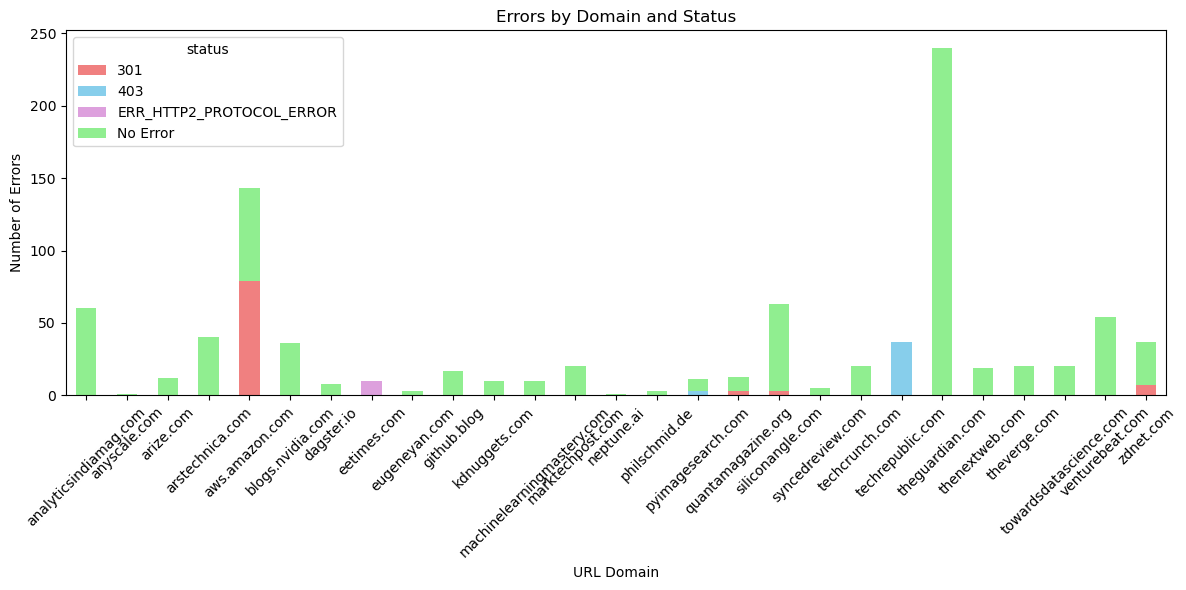

In [7]:
from ttd.flows.analysis import prepare_error_distribution_by_domain_and_status, \
                               plot_error_distribution_by_domain_and_status, \
                               get_oldest_and_latest_dates

df = prepare_error_distribution_by_domain_and_status(articles)
fig = plot_error_distribution_by_domain_and_status(df)

### 📊 Article Repartition Over Time (by Domain)

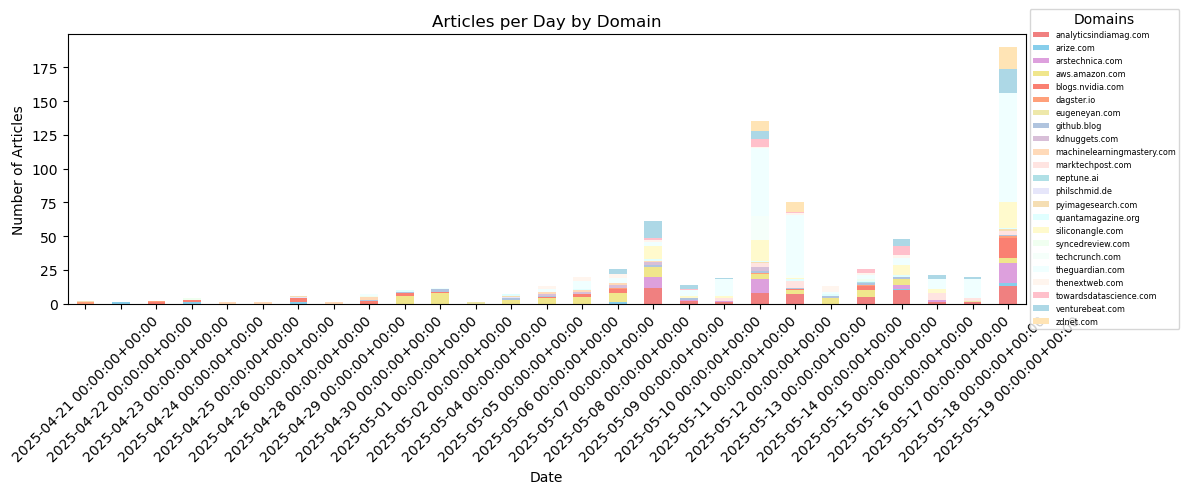

In [ ]:
from ttd.flows.analysis import prepare_article_distribution_indexed_by_date, \
                               plot_article_distribution_indexed_by_date

df = prepare_article_distribution_indexed_bLLJjkJy_date(articles_with_no_error, n_months=1)
fig = plot_article_distribution_indexed_by_date(df)

### 🧾 Field Coverage Summary

In [9]:
from ttd.flows.analysis import prepare_field_coverage, generate_field_coverage_markdown

field_coverage = prepare_field_coverage(articles_with_no_error)
print(generate_field_coverage_markdown(field_coverage, len(articles_with_no_error)))

### 📊 Field Coverage Report (771 articles)

| Field | Count | Coverage |
|-------|--------|----------|
| `title` | 771 | 100.0% |
| `published_date` | 771 | 100.0% |
| `url_domain` | 771 | 100.0% |
| `html_content_artifact` | 771 | 100.0% |
| `summary` | 769 | 99.7% |
| `author` | 726 | 94.2% |
| `tags` | 706 | 91.6% |


### Summary Analysis


📊 Comparison of Content Sizes (top 20 by html_content length):
URL                                                |   HTML |   Text |  Summary
--------------------------------------------------------------------------------
https://www.theguard                               | 317032 |    840 |      627
https://www.theguard                               | 290832 |   2477 |     1410
https://www.theguard                               | 294676 |   2989 |     1692
https://www.theguard                               | 288067 |    987 |      520
https://www.theguard                               | 308706 |   2741 |     1329
https://www.theguard                               | 322394 |   2084 |      988
https://www.theguard                               | 291127 |   1353 |      627
https://www.theguard                               | 292126 |   1568 |      702
https://www.theguard                               | 305193 |   3573 |     1578
https://github.blog/                               | 17

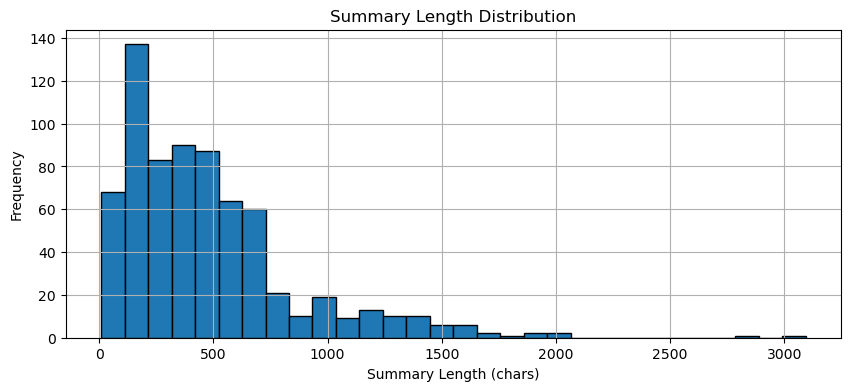

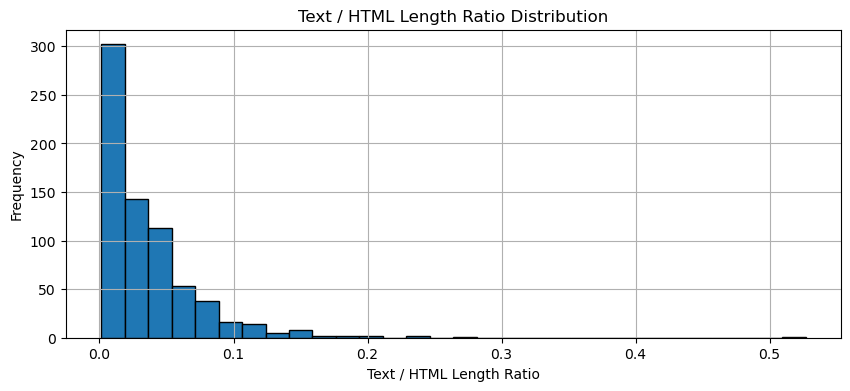

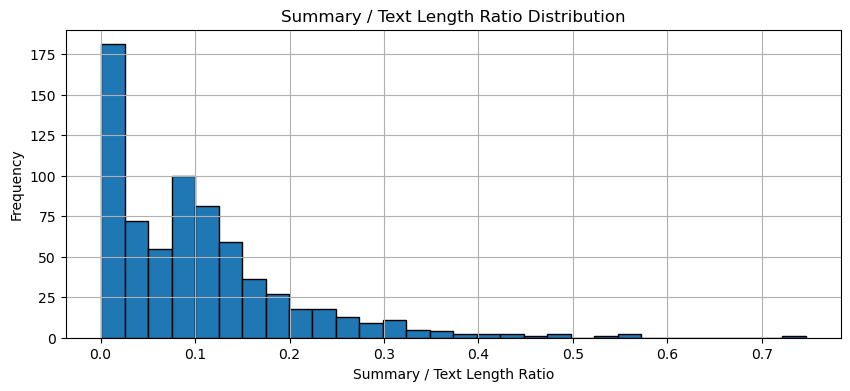

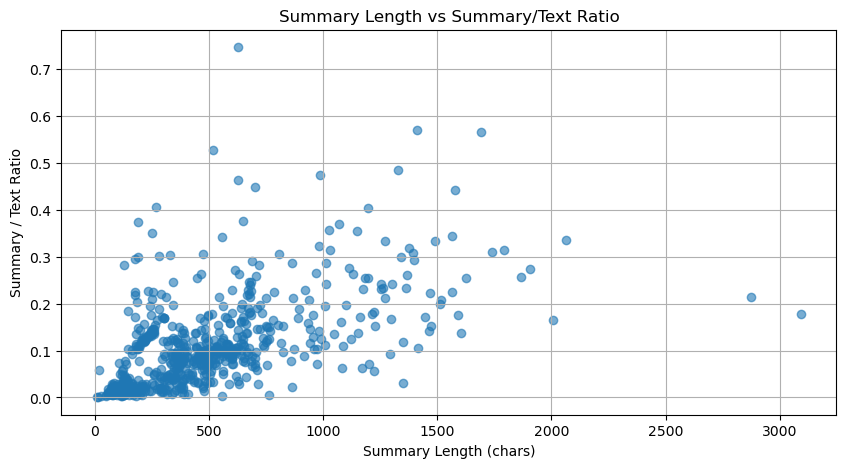

In [10]:
import matplotlib.pyplot as plt

def compare_content_sizes(articles, storage):
    results = []
    summary_lengths = []
    text_html_ratios = []
    summary_text_ratios = []

    for article in articles:
        try:
            html_len = article['html_content_length']
            text_len = article['text_content_length']
            summary_len = article['summary_length']
            summary_text_ratio = article['summary_text_ratio']

            if summary_text_ratio < 0.8:
                results.append({
                    "url": article.get("url"),
                    "html_len": html_len,
                    "text_len": text_len,
                    "summary_len": summary_len,
                    "summary_text_ratio": summary_len / text_len
                })

                if summary_len > 0 and html_len > 0 and text_len > 0:
                    summary_lengths.append(summary_len)
                    text_html_ratios.append(text_len / html_len)
                    summary_text_ratios.append(summary_len / text_len)

        except Exception as e:
            print(f"⚠️ Error processing article: {article.get('url')} - {e}")

    # Print comparison table
    results.sort(key=lambda x: x["summary_text_ratio"], reverse=True)
    print(f"\n📊 Comparison of Content Sizes (top 20 by html_content length):")
    print(f"{'URL':50} | {'HTML':>6} | {'Text':>6} | {'Summary':>8}")
    print("-" * 80)
    for r in results[:20]:
        print(f"{r['url'][:20]:50} | {r['html_len']:6} | {r['text_len']:6} | {r['summary_len']:8}")

    # Plot summary length distribution
    plt.figure(figsize=(10, 4))
    plt.hist(summary_lengths, bins=30, edgecolor='black')
    plt.title("Summary Length Distribution")
    plt.xlabel("Summary Length (chars)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Plot text/html ratio
    plt.figure(figsize=(10, 4))
    plt.hist(text_html_ratios, bins=30, edgecolor='black')
    plt.title("Text / HTML Length Ratio Distribution")
    plt.xlabel("Text / HTML Length Ratio")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Plot summary/text ratio
    plt.figure(figsize=(10, 4))
    plt.hist(summary_text_ratios, bins=30, edgecolor='black')
    plt.title("Summary / Text Length Ratio Distribution")
    plt.xlabel("Summary / Text Length Ratio")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Scatter plot: summary_length vs summary_text_ratio
    plt.figure(figsize=(10, 5))
    plt.scatter(summary_lengths, summary_text_ratios, alpha=0.6)
    plt.title("Summary Length vs Summary/Text Ratio")
    plt.xlabel("Summary Length (chars)")
    plt.ylabel("Summary / Text Ratio")
    plt.grid(True)
    plt.show()

    return results

results = compare_content_sizes(articles_with_no_error, storage)

### TAGs Analysis

In [11]:
from collections import Counter

def count_all_tags(articles):
    tag_counter = Counter()
    for article in articles:
        tags = article.get("tags", [])
        if isinstance(tags, list):
            tag_counter.update(tags)
    return tag_counter

# Run and display
tag_counts = count_all_tags(articles_with_no_error)
print("There are ", len(tag_counts), "different tags :")
print("\n🏷️ Most Common Tags:")
for tag, count in tag_counts.most_common(100):  # change number to see more
    print(f"{tag:20} : {count}")

There are  2320 different tags :

🏷️ Most Common Tags:
AI                   : 111
Culture              : 72
UK news              : 60
NEWS                 : 60
Business             : 54
Artificial Intelligence : 47
The-Latest           : 45
Life and style       : 44
World news           : 42
Politics             : 28
GamesBeat            : 28
Editors Pick         : 27
Technology           : 27
AI News              : 27
Gaming Business      : 27
Tech                 : 24
Europe               : 23
US news              : 23
Generative AI        : 22
Sport                : 21
AI, ML and Deep Learning : 21
Society              : 20
Machine Learning     : 19
Staff                : 19
Cube Event Coverage  : 19
#theCube             : 19
generative AI        : 18
Security             : 16
Data Science         : 16
AI Shorts            : 15
Tech News            : 15
Gaming               : 15
Environment          : 15
AI agents            : 15
Art and design       : 15
Keir Starmer         : 15
F

#### Quick test synonyms detection

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

from ttd.models.loader import load_model_spec

def find_strong_synonyms(
    tag_counts,              # dict or Counter: tag -> count
    embedding_model,         # Must have .predict(list_of_tags) method
    threshold: float = 0.92,
    lower: bool = True
):
    # 1. Normalize tag keys and merge frequencies
    normalized_counts = {}
    original_forms = {}  # normalized_tag -> list of (original_tag, count)
    for tag, count in tag_counts:
        tag_key = tag.lower() if lower else tag
        normalized_counts[tag_key] = normalized_counts.get(tag_key, 0) + count
        original_forms.setdefault(tag_key, []).append((tag, count))

    tags = list(normalized_counts.keys())

    # 2. Embed using the model (with internal cache)
    embeddings = {tag:embedding_model.predict(tag)["output"] for tag in tags}

    names = list(embeddings.keys())
    vectors = np.array([embeddings[name] for name in names])
    sim_matrix = cosine_similarity(vectors)

    # 4. Group synonyms
    tag_synonyms = []
    assigned_tags = set()

    for i, tag in enumerate(names):
        if tag in assigned_tags:
            continue

        group_members = [(tag, normalized_counts.get(tag, 1))]
        for j, other_tag in enumerate(names):
            if i != j and other_tag not in assigned_tags and sim_matrix[i][j] >= threshold:
                group_members.append((other_tag, normalized_counts.get(other_tag, 1)))
                assigned_tags.add(other_tag)

        group_members = sorted(group_members, key=lambda x: -x[1])
        main_tag, main_count = group_members[0]
        synonyms = [
            {"tag": tag_, "count": count_}
            for tag_, count_ in group_members[1:]
        ]

        tag_synonyms.append({
            "name": main_tag,
            "count": main_count,
            "synonyms": synonyms
        })
        assigned_tags.update(tag_ for tag_, _ in group_members)

    return tag_synonyms

tag_embedding_spec = load_model_spec("tag_embedding_spec")
tags = tag_counts.most_common(100)
results = find_strong_synonyms(
    tags,
    tag_embedding_spec._loaded_model,
    threshold=0.6,
    lower=False
)
for group in results:
    print(group)

2025-05-20 08:21:57,311 - httpx - DEBUG - load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-20 08:21:57 [httpx] DEBUG: load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-20 08:21:57,312 - httpx - DEBUG - load_verify_locations cafile='/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/certifi/cacert.pem'
2025-05-20 08:21:57 [httpx] DEBUG: load_verify_locations cafile='/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/certifi/cacert.pem'
2025-05-20 08:21:57,343 - httpcore.connection - DEBUG - connect_tcp.started host='api.openai.com' port=443 local_address=None timeout=5.0 socket_options=None
2025-05-20 08:21:57 [httpcore.connection] DEBUG: connect_tcp.started host='api.openai.com' port=443 local_address=None timeout=5.0 socket_options=None
2025-05-20 08:21:57,388 - httpcore.connection - DEBUG - connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x1574e7b80>
2025-05-20 0

{'name': 'AI', 'count': 111, 'synonyms': [{'tag': 'Artificial Intelligence', 'count': 47}, {'tag': 'AI News', 'count': 27}, {'tag': 'AI agents', 'count': 15}, {'tag': 'AI Features', 'count': 14}, {'tag': 'AI (Artificial Intelligence)', 'count': 8}]}
{'name': 'Culture', 'count': 72, 'synonyms': []}
{'name': 'UK news', 'count': 60, 'synonyms': [{'tag': 'World news', 'count': 42}, {'tag': 'US news', 'count': 23}]}
{'name': 'NEWS', 'count': 60, 'synonyms': [{'tag': 'News', 'count': 13}]}
{'name': 'Business', 'count': 54, 'synonyms': []}
{'name': 'The-Latest', 'count': 45, 'synonyms': []}
{'name': 'Life and style', 'count': 44, 'synonyms': []}
{'name': 'Politics', 'count': 28, 'synonyms': []}
{'name': 'GamesBeat', 'count': 28, 'synonyms': []}
{'name': 'Editors Pick', 'count': 27, 'synonyms': []}
{'name': 'Technology', 'count': 27, 'synonyms': [{'tag': 'Tech', 'count': 24}, {'tag': 'Science', 'count': 14}]}
{'name': 'Gaming Business', 'count': 27, 'synonyms': [{'tag': 'Gaming', 'count': 15}]

In [13]:
from email.utils import parsedate_to_datetime, format_datetime
from typing import List, Optional

def get_oldest_and_latest_dates(articles: List[dict]) -> tuple[Optional[str], Optional[str]]:
    """Return the oldest and most recent published_date as RFC 1123 strings."""
    dates = []
    for article in articles:
        pub_date = article.get("published_date")
        try:
            dt = parsedate_to_datetime(pub_date)
            dates.append(dt)
        except Exception:
            continue

    if not dates:
        return None, None

    oldest = format_datetime(min(dates))
    latest = format_datetime(max(dates))
    return oldest, latest


## Inspect result

In [14]:
flow.config.get("db_path")

'/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json'

In [15]:
from ttd.storage.ttd_storage import TTDStorage

storage = TTDStorage(flow.config.get("db_path"))
storage.get_all('ingestions')[-1]

{'articles_table': 'dummy_articles',
 'articles_limit': 1,
 'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
 'rss_article_scraper': 2,
 'stealth_rss_article_scraper': 1,
 'first_id': 0,
 'last_id': 3,
 'duration': 5.745080947875977,
 'table_name': 'ingestions',
 'created_at': '2025-05-20T06:21:54.806747',
 'doc_id': '13'}

In [16]:
storage.get_all(flow.articles_table)

[{'title': 'Programmable AI Silicon Would Help Meet AI Workload Demand',
  'author': 'Nitin Dahad',
  'published_date': 'Mon, 19 May 2025 23:29:04 +0000',
  'url_domain': 'eetimes.com',
  'url': 'https://www.eetimes.com/programmable-ai-silicon-would-help-meet-ai-workload-demand/',
  'summary': '<p>At Imec ITF World 2025, imec CEO will say we need silicon hardware to be almost as codable as software to keep up with pace of AI workloads. </p>\n<p>The post <a href="https://www.eetimes.com/programmable-ai-silicon-would-help-meet-ai-workload-demand/">Programmable AI Silicon Would Help Meet AI Workload Demand</a> appeared first on <a href="https://www.eetimes.com">EE Times</a>.</p>',
  'tags': ['Blog', 'News', 'AI', 'AI accelerator', 'Semiconductors'],
  'metadata': {'error': {'status': None, 'url': None}, 'duration': 0},
  'table_name': 'dummy_articles',
  'created_at': '2025-05-20T06:21:50.270069',
  'doc_id': '1'},
 {'title': 'AWS CodeBuild adds support for new IAM condition keys',
  'aut

In [17]:
from metaflow import Flow

flow = Flow('ArticleIngestionFlow')

for run in flow.runs():
    print(f"- Run ID: {run.id} | Date: {run.created_at} | Status: {run.successful}")

- Run ID: 1747689013498111 | Date: 2025-05-19 23:10:13.498000 | Status: True
- Run ID: 1747688800246719 | Date: 2025-05-19 23:06:40.247000 | Status: True
- Run ID: 1747688675576115 | Date: 2025-05-19 23:04:35.576000 | Status: True
- Run ID: 1747688640193216 | Date: 2025-05-19 23:04:00.193000 | Status: True
- Run ID: 1747688391741849 | Date: 2025-05-19 22:59:51.742000 | Status: True
- Run ID: 1747688195417934 | Date: 2025-05-19 22:56:35.418000 | Status: True
- Run ID: 1747675161290681 | Date: 2025-05-19 19:19:21.291000 | Status: True
- Run ID: 1747675094605039 | Date: 2025-05-19 19:18:14.605000 | Status: False
- Run ID: 1747674843427567 | Date: 2025-05-19 19:14:03.428000 | Status: False
- Run ID: 1747674824959066 | Date: 2025-05-19 19:13:44.959000 | Status: False
- Run ID: 1747674768730471 | Date: 2025-05-19 19:12:48.731000 | Status: False
- Run ID: 1747674716670454 | Date: 2025-05-19 19:11:56.671000 | Status: False
- Run ID: 1747674658196293 | Date: 2025-05-19 19:10:58.196000 | Status: